<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [524]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [525]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [526]:
# loading the data: Wholesale customers data

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wholesale_customers = fetch_ucirepo(id=292) 
  
# data (as pandas dataframes) 
X = wholesale_customers.data.features 
y = wholesale_customers.data.targets 
  
# metadata 
print(wholesale_customers.metadata) 
  
# variable information 
print(wholesale_customers.variables) 

{'uci_id': 292, 'name': 'Wholesale customers', 'repository_url': 'https://archive.ics.uci.edu/dataset/292/wholesale+customers', 'data_url': 'https://archive.ics.uci.edu/static/public/292/data.csv', 'abstract': 'The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 440, 'num_features': 7, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Region'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5030X', 'creators': ['Margarida Cardoso'], 'intro_paper': None, 'additional_info': {'summary': None, 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_description':

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [527]:
type(wholesale_customers)

ucimlrepo.dotdict.dotdict

In [528]:
wholesale_customers.keys()

dict_keys(['data', 'metadata', 'variables'])

In [529]:
wholesale_customers["metadata"]

{'uci_id': 292,
 'name': 'Wholesale customers',
 'repository_url': 'https://archive.ics.uci.edu/dataset/292/wholesale+customers',
 'data_url': 'https://archive.ics.uci.edu/static/public/292/data.csv',
 'abstract': 'The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories',
 'area': 'Business',
 'tasks': ['Classification', 'Clustering'],
 'characteristics': ['Multivariate'],
 'num_instances': 440,
 'num_features': 7,
 'feature_types': ['Integer'],
 'demographics': [],
 'target_col': ['Region'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2013,
 'last_updated': 'Mon Feb 05 2024',
 'dataset_doi': '10.24432/C5030X',
 'creators': ['Margarida Cardoso'],
 'intro_paper': None,
 'additional_info': {'summary': None,
  'purpose': None,
  'funded_by': None,
  'instances_represent': None,
  'recommended_data_splits': None,
  'sensitive_data': Non

In [530]:
wholesale_customers["data"]

{'ids': None,
 'features':      Channel  Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
 0          2  12669   9656     7561     214              2674        1338
 1          2   7057   9810     9568    1762              3293        1776
 2          2   6353   8808     7684    2405              3516        7844
 3          1  13265   1196     4221    6404               507        1788
 4          2  22615   5410     7198    3915              1777        5185
 ..       ...    ...    ...      ...     ...               ...         ...
 435        1  29703  12051    16027   13135               182        2204
 436        1  39228   1431      764    4510                93        2346
 437        2  14531  15488    30243     437             14841        1867
 438        1  10290   1981     2232    1038               168        2125
 439        1   2787   1698     2510      65               477          52
 
 [440 rows x 7 columns],
 'targets':      Region
 0         3
 1        

In [531]:
# What does each column mean?
X.columns

Index(['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen'],
      dtype='object')

In [532]:
# Any categorical data to convert?
wholesale_customers["variables"]

# Any missing data to remove?
# Answer: No

,name,role,type,demographic,description,units,missing_values
0,Channel,Feature,Categorical,None,None,None,no
1,Region,Target,Categorical,None,None,None,no
2,Fresh,Feature,Integer,None,None,None,no
3,Milk,Feature,Integer,None,None,None,no
4,Grocery,Feature,Integer,None,None,None,no
5,Frozen,Feature,Integer,None,None,None,no
6,Detergents_Paper,Feature,Integer,None,None,None,no
7,Delicassen,Feature,Integer,None,None,None,no


In [533]:
type(X)

pandas.core.frame.DataFrame

In [534]:
# No data type conversion necessary, as all variables are already numeric

X.dtypes

Channel             int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [535]:
# Column collinearity - any high correlations?

X.corr()

# High collinearity between Detergents_Paper and Grocery with 0.92 Otherwise no correlation above 0.8 as threshold.

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Fresh,-0.169172,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [536]:
y.value_counts()

Region
3         316
1          77
2          47
Name: count, dtype: int64

In [537]:
# Descriptive statistics - any outliers to remove?

X.describe()

# Yes outliers need to be removed in some variables.

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


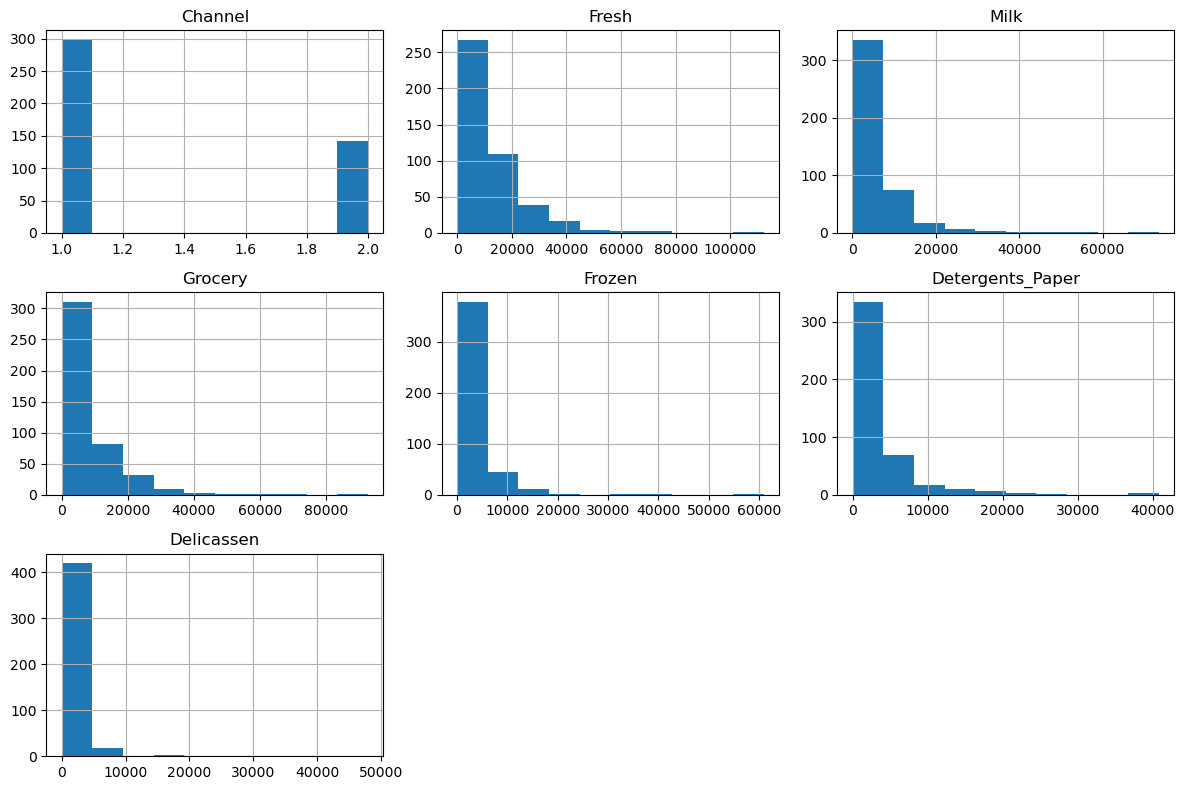

In [538]:
# Column-wise data distribution - is the distribution skewed?

X.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# The distribution of all of the variables is right-skewed.

**Your observations here**

- ex.: Frozen, Grocery, Milk and Detergents Paper have a high...
- ...



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [539]:
# Your code here
print(X.shape)

# Drop the column Detergents_Paper due to high collinearity
X = X.drop(columns = "Detergents_Paper")

(440, 7)


In [540]:
X.shape

(440, 6)

In [541]:
# Remove outliers
import numpy as np
from scipy import stats

X[(np.abs(stats.zscore(X)) < 3).all(axis=1)]

,Channel,Fresh,Milk,Grocery,Frozen,Delicassen
0,2,12669,9656,7561,214,1338
1,2,7057,9810,9568,1762,1776
2,2,6353,8808,7684,2405,7844
3,1,13265,1196,4221,6404,1788
4,2,22615,5410,7198,3915,5185
...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,2204
436,1,39228,1431,764,4510,2346
437,2,14531,15488,30243,437,1867
438,1,10290,1981,2232,1038,2125


In [542]:
# Logistic transformation due to skewness

num_cols = X.columns

In [543]:
X_copy = X.copy()

In [544]:
X_log[num_cols] = X_log[num_cols].apply(lambda x: np.log1p(x))

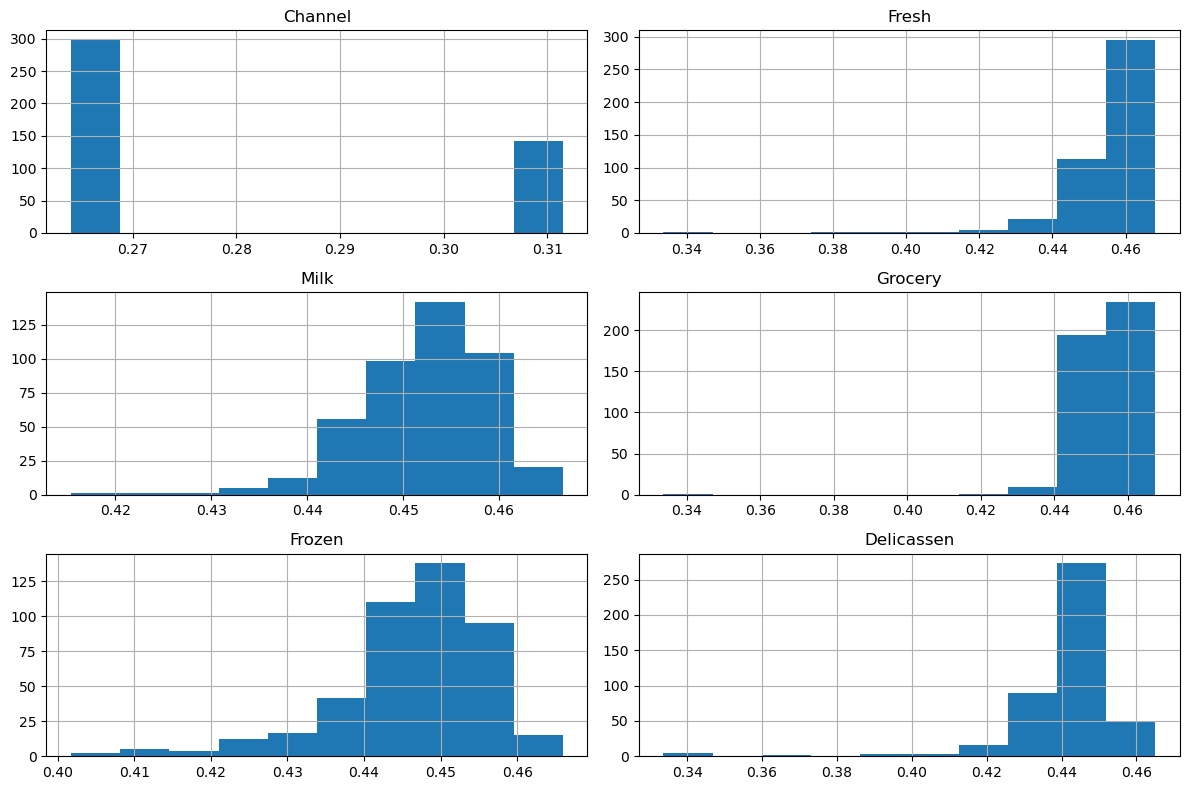

In [545]:
X_log.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()



**Your comment here**
-  ...
-  ...

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [546]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

scaler = StandardScaler()
scaler = scaler.fit(X_copy)
customers_scale = scaler.transform(X_copy)


In [563]:
customers_scale = pd.DataFrame(customers_scale)
print(customers_scale)

            0         1         2         3         4         5
0    1.448652  0.052933  0.523568 -0.041115 -0.589367 -0.066339
1    1.448652 -0.391302  0.544458  0.170318 -0.270136  0.089151
2    1.448652 -0.447029  0.408538 -0.028157 -0.137536  2.243293
3   -0.690297  0.100111 -0.624020 -0.392977  0.687144  0.093411
4    1.448652  0.840239 -0.052396 -0.079356  0.173859  1.299347
..        ...       ...       ...       ...       ...       ...
435 -0.690297  1.401312  0.848446  0.850760  2.075222  0.241091
436 -0.690297  2.155293 -0.592142 -0.757165  0.296561  0.291501
437  1.448652  0.200326  1.314671  2.348386 -0.543380  0.121456
438 -0.690297 -0.135384 -0.517536 -0.602514 -0.419441  0.213046
439 -0.690297 -0.729307 -0.555924 -0.573227 -0.620094 -0.522869

[440 rows x 6 columns]


In [548]:
scaler = StandardScaler()
scaler = scaler.fit(X_log)
customers_scale_log = scaler.transform(X_log)

customers_scale_log = pd.DataFrame(customers_scale_log)
customers_scale_log.describe()


,0,1,2,3,4,5
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-9.689219e-16,-4.179990e-15,1.072274e-14,-4.771940e-15,-3.447747e-15,-2.704907e-16
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-9.652795e+00,-5.621160e+00,-1.454740e+01,-4.658669e+00,-7.052347e+00
25%,-6.902971e-01,-1.798526e-01,-6.343777e-01,-4.449007e-01,-3.821239e-01,-2.118156e-01
50%,-6.902971e-01,2.404745e-01,1.578742e-01,1.025874e-01,1.429087e-01,2.308295e-01
75%,1.448652e+00,4.936393e-01,7.081056e-01,5.903740e-01,6.730412e-01,5.097877e-01
max,1.448652e+00,1.075727e+00,2.205457e+00,1.648034e+00,2.006116e+00,1.553234e+00


In [549]:
X_copy == X_log

,Channel,Fresh,Milk,Grocery,Frozen,Delicassen
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
435,False,False,False,False,False,False
436,False,False,False,False,False,False
437,False,False,False,False,False,False
438,False,False,False,False,False,False


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [550]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Your code here:

kmeans = KMeans(n_clusters=3).fit(X_log)
kmeans_labels = kmeans.fit_predict(X_log)


c:\Users\yannik_sassmann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\yannik_sassmann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


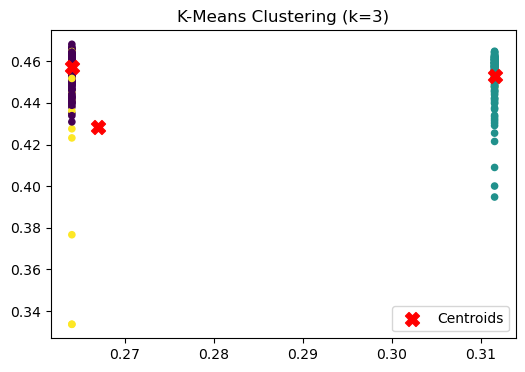

K-Means Silhouette Score: 0.600


In [551]:
# Plot K-Means results
plt.figure(figsize=(6, 4))
plt.scatter(X_log.iloc[:, 0], X_log.iloc[:, 1], c=kmeans_labels, cmap='viridis', s=20)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=100, label='Centroids')
plt.title("K-Means Clustering (k=3)")
plt.legend()
plt.show()

# Silhouette Score
kmeans_score = silhouette_score(X_log, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_score:.3f}")

In [552]:
kmeans = KMeans(n_clusters=2).fit(X_log)
kmeans_labels = kmeans.fit_predict(X_log)

c:\Users\yannik_sassmann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\yannik_sassmann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


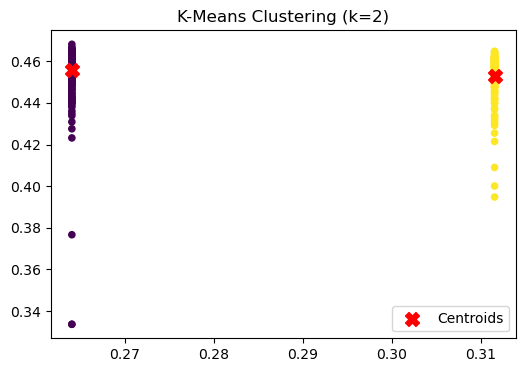

K-Means Silhouette Score: 0.572


In [553]:
# Plot K-Means results
plt.figure(figsize=(6, 4))
plt.scatter(X_log.iloc[:, 0], X_log.iloc[:, 1], c=kmeans_labels, cmap='viridis', s=20)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=100, label='Centroids')
plt.title("K-Means Clustering (k=2)")
plt.legend()
plt.show()

# Silhouette Score
kmeans_score = silhouette_score(X_log, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_score:.3f}")

In [554]:
kmeans = KMeans(n_clusters=2).fit(X_copy)
kmeans_labels = kmeans.fit_predict(X_copy)

c:\Users\yannik_sassmann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\yannik_sassmann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


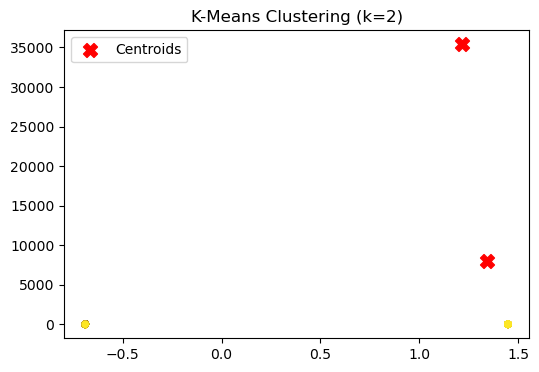

K-Means Silhouette Score: 0.395


In [555]:
# Plot K-Means results
plt.figure(figsize=(6, 4))
plt.scatter(customers_scale.iloc[:, 0], customers_scale.iloc[:, 1], c=kmeans_labels, cmap='viridis', s=20)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=100, label='Centroids')
plt.title("K-Means Clustering (k=2)")
plt.legend()
plt.show()

# Silhouette Score
kmeans_score = silhouette_score(customers_scale, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_score:.3f}")

In [556]:
# Kmeans seems to work better for the untransformed X data, rather than the logistically transformed data.

In [557]:
# In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record.
# What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [558]:
X_copy["labels"] = pd.Series(kmeans_labels)

Count the values in `labels`.

In [559]:
# Your code here:
X_copy["labels"].value_counts()

labels
1    375
0     65
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [579]:
from sklearn.cluster import DBSCAN 

# Your code here
dbscan = DBSCAN(eps = 0.5, min_samples=12)
dbscan_labels = dbscan.fit_predict(customers_scale)



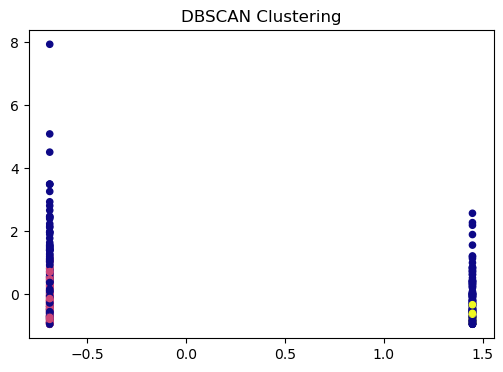

DBSCAN Silhouette Score (excluding noise): 0.652


In [580]:
plt.figure(figsize=(6, 4))
plt.scatter(customers_scale.iloc[:, 0], customers_scale.iloc[:, 1], c=dbscan_labels, cmap='plasma', s=20)
plt.title("DBSCAN Clustering")
plt.show()

mask = dbscan_labels != -1
X_arr = customers_scale.values

if len(np.unique(dbscan_labels[mask])) > 1:
    dbscan_score = silhouette_score(X_arr[mask], dbscan_labels[mask])
    print(f"DBSCAN Silhouette Score (excluding noise): {dbscan_score:.3f}")
else:
    print("DBSCAN detected less than 2 clusters; silhouette score not applicable.")

Count the values in `labels_DBSCAN`.

In [581]:
# Your code here
X_copy["labels_DBSCAN"] = pd.Series(dbscan_labels)

In [582]:
X_copy["labels_DBSCAN"].value_counts()

labels_DBSCAN
-1    221
 0    194
 1     25
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [583]:
def plot(x,y,hue, title):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title(title)
    return plt.show();

In [584]:
print(X_copy)

     Channel  Fresh   Milk  Grocery  Frozen  Delicassen  labels  labels_DBSCAN
0          2  12669   9656     7561     214        1338       1             -1
1          2   7057   9810     9568    1762        1776       1             -1
2          2   6353   8808     7684    2405        7844       1             -1
3          1  13265   1196     4221    6404        1788       1             -1
4          2  22615   5410     7198    3915        5185       0             -1
..       ...    ...    ...      ...     ...         ...     ...            ...
435        1  29703  12051    16027   13135        2204       0             -1
436        1  39228   1431      764    4510        2346       0             -1
437        2  14531  15488    30243     437        1867       1             -1
438        1  10290   1981     2232    1038        2125       1              0
439        1   2787   1698     2510      65          52       1              0

[440 rows x 8 columns]


In [585]:
# I cant compare Detergents_Paper because i dropped that column due to high collinearity.

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

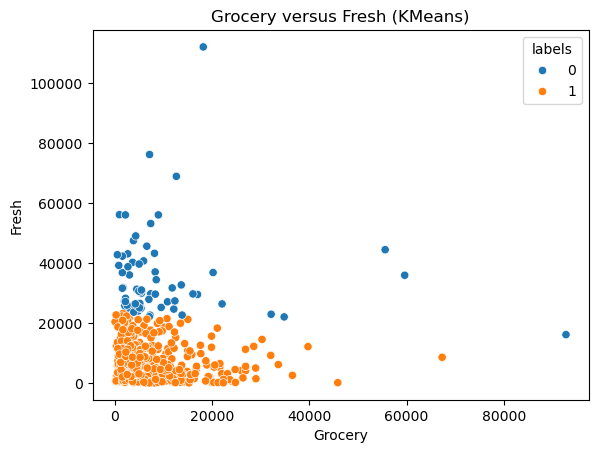

In [591]:
# Your code here:

# KMEans

plot(X_copy["Grocery"], X_copy["Fresh"], hue = X_copy["labels"], title = "Grocery versus Fresh (KMeans)")

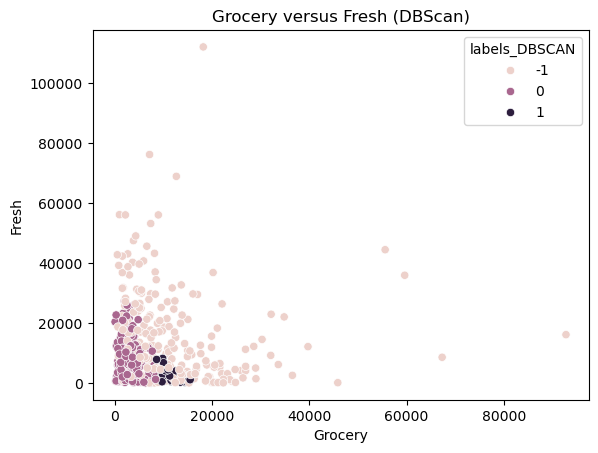

In [592]:
# DBScan

plot(X_copy["Grocery"], X_copy["Fresh"], hue = X_copy["labels_DBSCAN"], title = "Grocery versus Fresh (DBScan)")

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

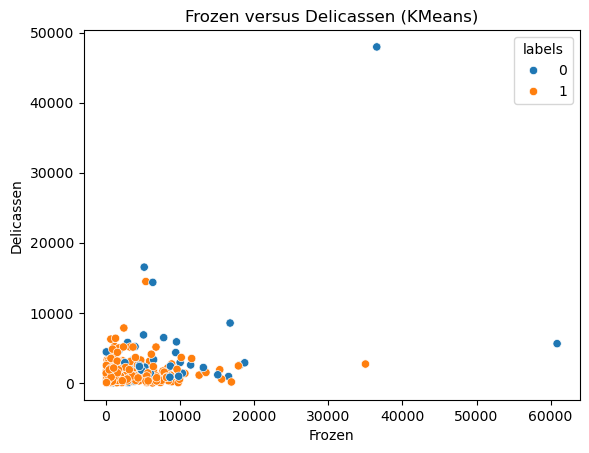

In [593]:
# Your code here:

# KMEans

plot(X_copy["Frozen"], X_copy["Delicassen"], hue = X_copy["labels"], title = "Frozen versus Delicassen (KMeans)")

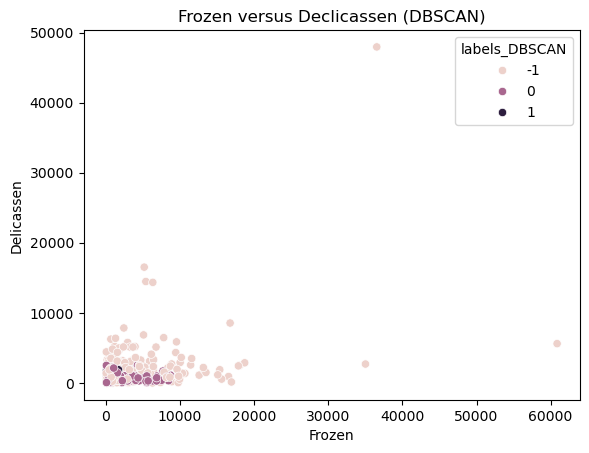

In [594]:
# KMEans

plot(X_copy["Frozen"], X_copy["Delicassen"], hue = X_copy["labels_DBSCAN"], title = "Frozen versus Declicassen (DBSCAN)")

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [ ]:
# Your code here:

km_means = X_copy.groupby(labels).mean()
print(km_means)


    Channel         Fresh          Milk       Grocery       Frozen  \
0  1.330049   9374.738916   5141.214286   7490.527094  2602.426108   
1  1.235294  43352.558824  13618.352941  13453.176471  8678.382353   

    Delicassen    labels  labels_DBSCAN  
0  1289.596059  0.923645      -0.399015  
1  4334.323529  0.000000      -1.000000  


In [ ]:
dbscan_means = X_copy.groupby(dbscan_labels).mean()
print(dbscan_means)

     Channel         Fresh         Milk       Grocery       Frozen  \
-1  1.529412  16118.900452  8798.941176  12171.457014  4207.040724   
 0  1.000000   8509.159794  2141.242268   2745.237113  2086.288660   
 1  2.000000   2683.080000  7615.600000  11043.760000   686.160000   

     Delicassen    labels  labels_DBSCAN  
-1  2265.416290  0.723982           -1.0  
 0   734.958763  0.979381            0.0  
 1  1108.160000  1.000000            1.0  


Which algorithm appears to perform better?

In [ ]:
# DBSCAN performs better.

**Your observations here**

- 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here:

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

**Your comment here**

- 